<a href="https://colab.research.google.com/github/DineshAnalyticsandAI/Diabetes-Detection/blob/master/Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Detection - Machine Learning Model & Web Application

### Project Overview
Business Domain:  Healthcare:  Diabetes
Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. In the past three decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. For people living with diabetes, access to affordable treatment, including insulin, is critical to their survival. There is a globally agreed target to halt the rise in diabetes and obesity by 2025. 

About 422 million people worldwide have diabetes, the majority living in low-and middle-income countries, and 1.6 million deaths are directly attributed to diabetes each year. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades. 
International Diabetes Federation Key Facts 
(https://www.idf.org/aboutdiabetes/what-is-diabetes/facts-figures.html ): 
•	In year 2019 , Approximately 463 million adults (20-79 years) were living with diabetes; by 2045 this will rise to 700 million
•	The proportion of people with type 2 diabetes is increasing in most countries
•	79% of adults with diabetes were living in low- and middle-income countries
•	1 in 5 of the people who are above 65 years old have diabetes
•	1 in 2 (232 million) people with diabetes were undiagnosed
•	Diabetes caused 4.2 million deaths
•	Diabetes caused at least USD 760 billion dollars in health expenditure in 2019 – 10% of total spending on adults
•	More than 1.1 million children and adolescents are living with type 1 diabetes
•	More than 20 million live births (1 in 6 live births) are affected by diabetes during pregnancy


### Problem Statement
Diabetes is one of the major chronic diseases in the world.  Early detection and management of disease is key influencer which can help in controlling diabetes. There is need to build a Diabetes Detection web application which can predict whether a person has diabetes or not based on various medical predictors such as glucose level, body mass-index (BMI), Blood pressure, Insulin, Skin Thickness, Age, number of pregnancies and so on.   Web application should use latest and one of the best machine learning model to detect diabetes.  
This application will be useful for people to proactively identify if they are diabetic or not using their phone/laptop with internet connection.  


### Solution Overview
We will be following below steps to build Diabetes detection web application.   This is a supervised machine learning classification problem.  We will perform below steps,

**•	Data Acquisition &  EDA**
o	Data Collection:  Research and identify dataset for training Diabetes detection machine learning model.  We will utilize Kaggle Pima Indian Diabetes dataset.

**o	Perform Exploratory data on data** :   Understand data , features and correlations 
•	Model Training & Selection

**o	Develop, train and validate multiple models** and select best model
•	Evaluate model & Selection
o	   Evaluate and select best models
o	   Generate performance metrics such as F1 score, 
     Precision and Recall

**•	Develop Web application**
o	Use Streamlit to build web application


**•	Deploy Web application **
o	Deploy web application using Heroku (Cloud application platform)


# Analysis

#### Import ALL Libraries

In [50]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import itertools
plt.style.use('fivethirtyeight')

In [3]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

### Data Exploration

##### Import Pima Indian Diabetes **Dataset**

In [6]:
df = pd.read_csv('/content/diabetes.csv')
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Analyse Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### There are no null values in Diabetic datasets

In [14]:
# There is no null value in this dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### This is imbalanced dataset.  Non-Diabetic cases are more based on below visual.  

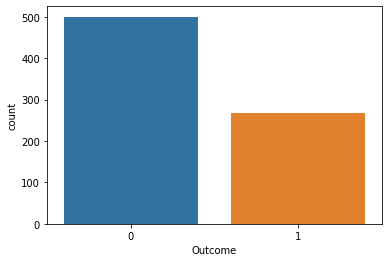

In [49]:
sns.countplot(x='Outcome',data=df)
plt.show()

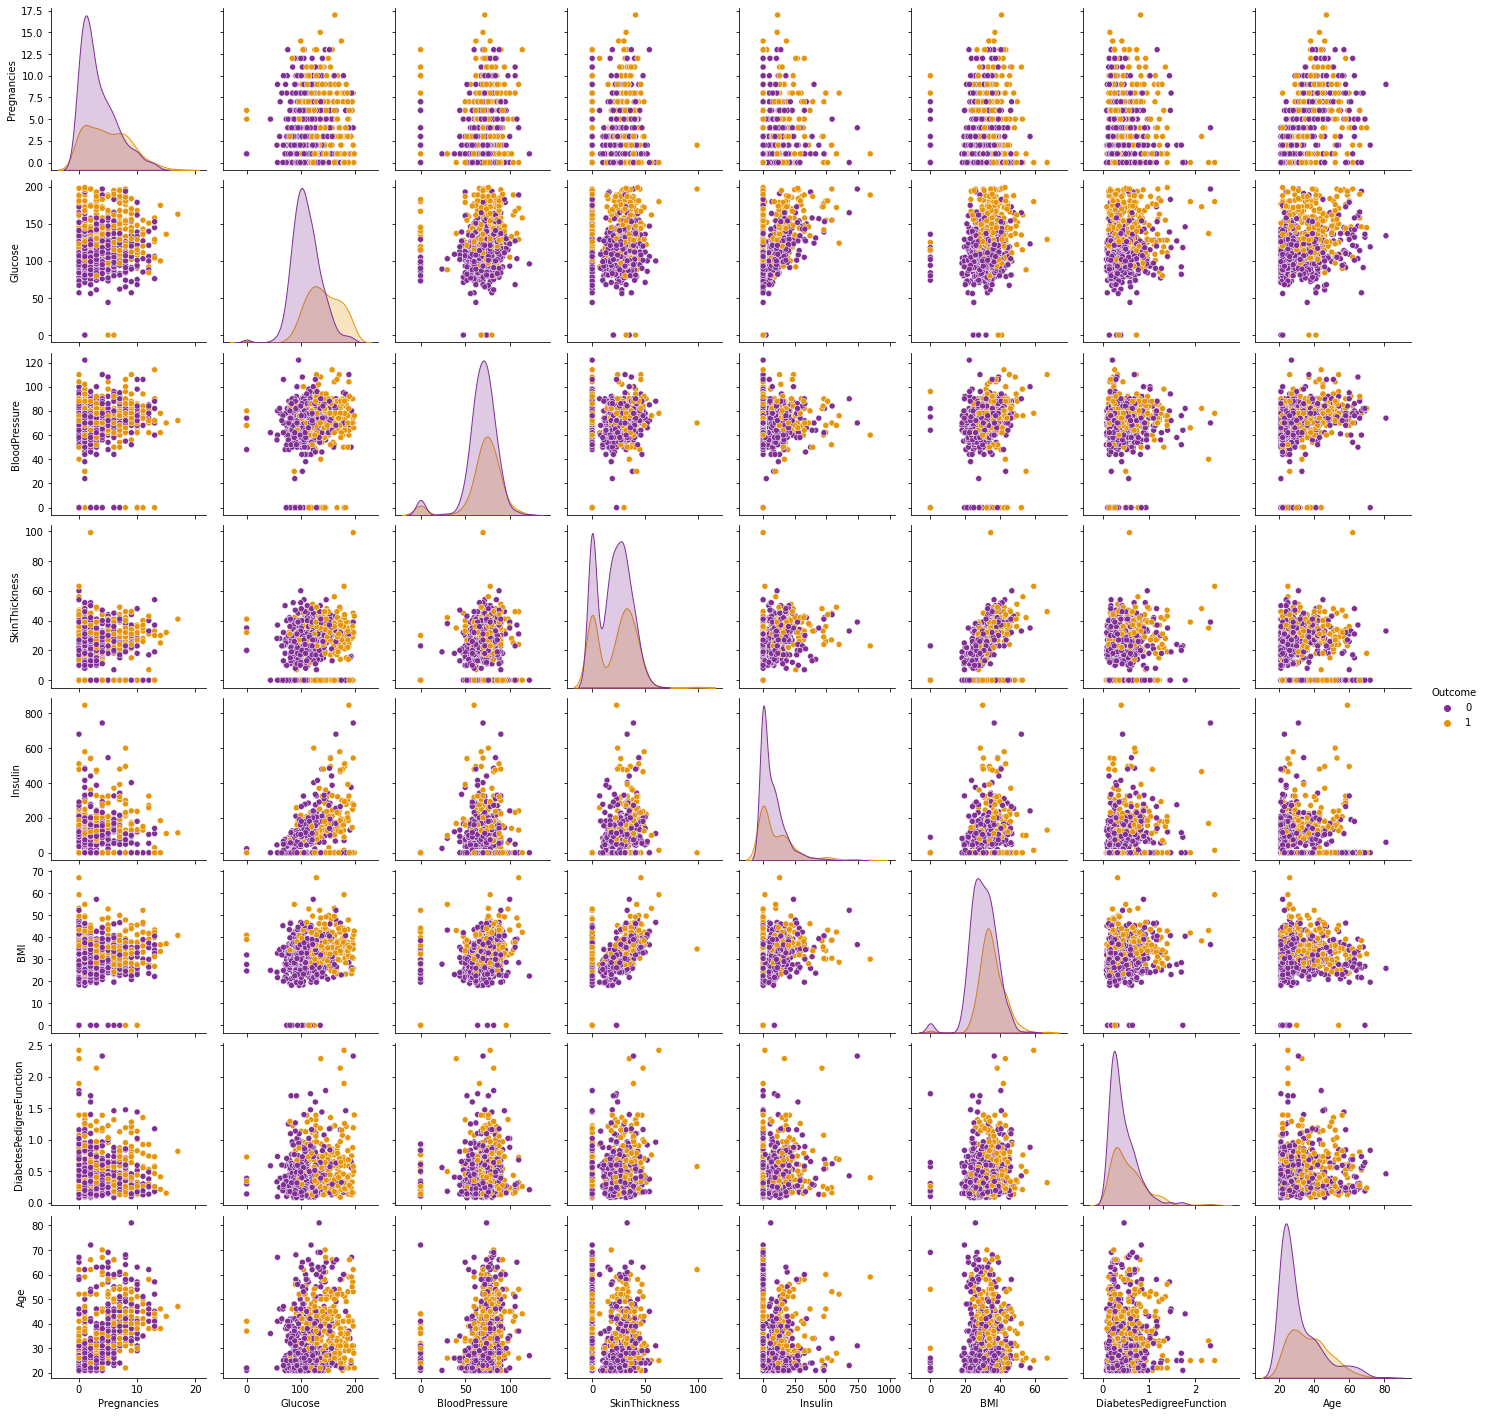

In [15]:
sns.pairplot(df,hue='Outcome', palette='CMRmap')

##### Below visual indicates lower glucose level with lower Insulin generally means that patient is not diabetic


Text(0.5, 1.0, 'Glucose vs Insulin - Scatter Plot')

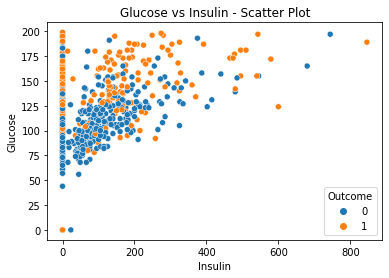

In [19]:
sns.scatterplot(data = df, x='Insulin',y='Glucose',hue='Outcome')
plt.title('Glucose vs Insulin - Scatter Plot')

Text(0.5, 1.0, 'Pregancies vs Glucose - Scatter Plot')

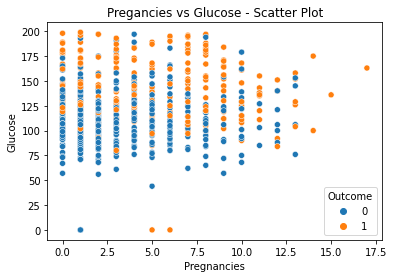

In [20]:
sns.scatterplot(data = df, x='Pregnancies',y='Glucose',hue='Outcome')
plt.title('Pregancies vs Glucose - Scatter Plot')

Text(0.5, 1.0, 'Pregancies vs BloodPressure - Scatter Plot')

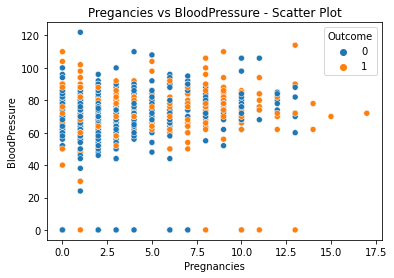

In [21]:
sns.scatterplot(data = df, x='Pregnancies',y='BloodPressure',hue='Outcome')
plt.title('Pregancies vs BloodPressure - Scatter Plot')

##### Review Independent variables histograms

Text(0.5, 1.0, 'Age Distibution')

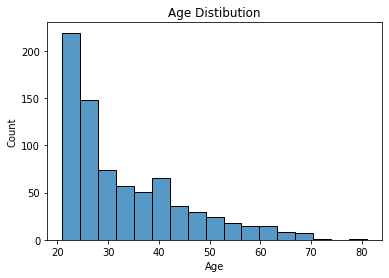

In [43]:
sns.histplot(df,x='Age')
plt.title('Age Distibution')


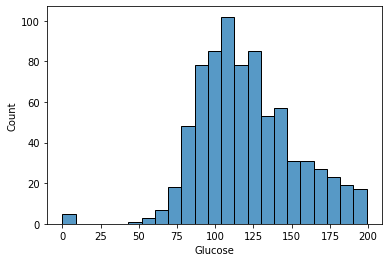

In [44]:
sns.histplot(df,x='Glucose')


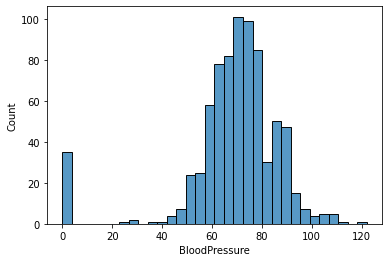

In [45]:
sns.histplot(df,x='BloodPressure')


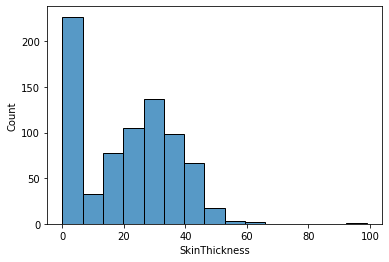

In [46]:
sns.histplot(df,x='SkinThickness')

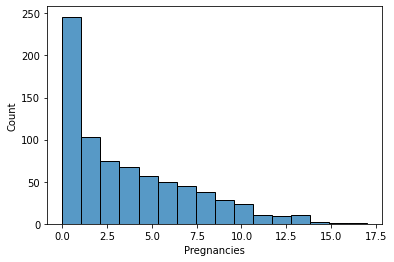

In [47]:
sns.histplot(df,x='Pregnancies')

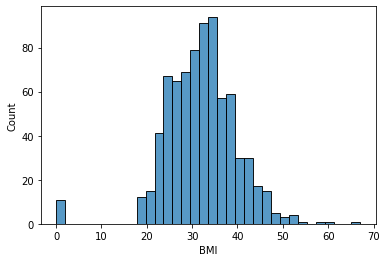

In [48]:
sns.histplot(df,x='BMI')

### Histograms 

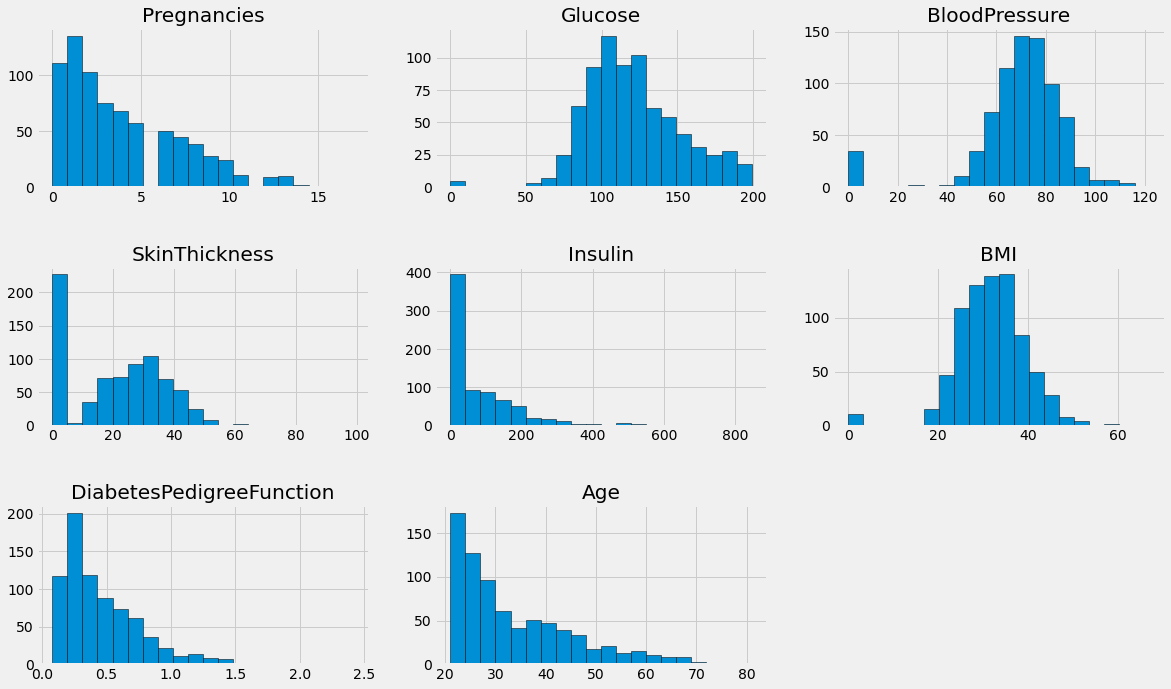

In [52]:
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Pearson's Correlation Coefficient: 
It helps to find correlation among variables. 

The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

### A heat map is a two-dimensional representation of information with the help of colors. 
Heat maps can help the user visualize simple or complex information.

#### Below Correlation matrix indicates that out of all listed medical independent variables, 
#### Insulin is most correlated to Outcome(Whether Patient is Diabetic or not ).  Insulin and Outcome correlation value is 0.47


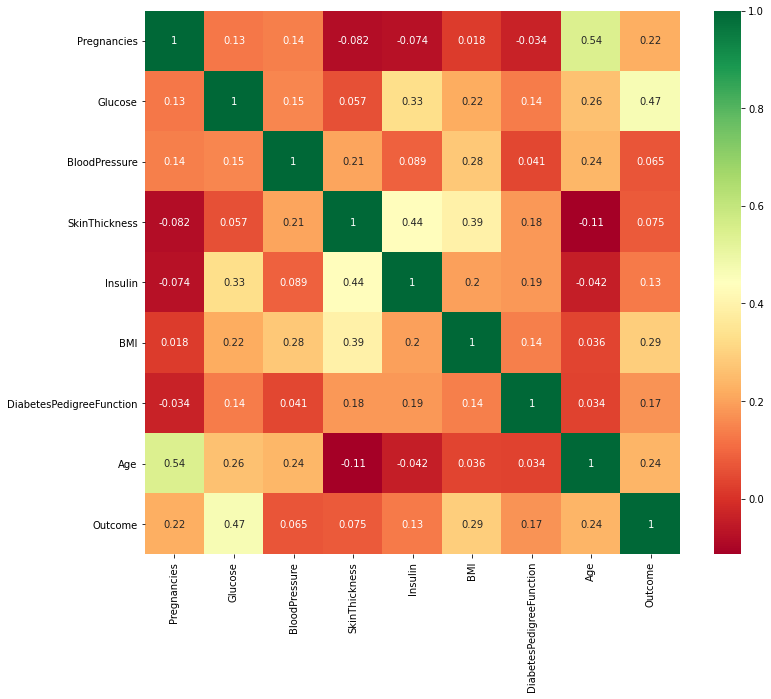

In [34]:
plt.figure(figsize=(12,10))  
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')   

# Split Data into Training & Test Data.
Since dataset is imbalanced, we will use stratify parameter during data split

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=df['Outcome'])

#### Review Training and Test splits

Data is stratified accurately.  As we can see below,  both training and test datasets have 34.8% Diabetes cases

In [139]:
print('*********************Training and Test Data -  Summary & Analysis *******************')
print('Total number of records in this Complete Diabetes Dataset : {}'.format(len(df)))
print('Total number of records in the Training set: {}'.format(len(x_train)))
print('Total number of records in the Test set: {}'.format(len(x_test)))
print ('  ')
print('% of Diabetes test cases in the Training Set : {}'.format(y_train.value_counts()[1]*100/len(y_train)))
print('% of Diabetes test cases in the Test Set : {}'.format(y_test.value_counts()[1]*100/len(y_test)))
print('    ')
print('Training Dataset Details:')
print('Total Number of records in the Training dataset :{}'.format(len(y_train)))
print('Total Number of Diabetic records in the Training dataset :{}'.format(y_train.value_counts()[1]))
print('Total Number of Non-Diabetic records in the Training dataset :{}'.format(y_train.value_counts()[0]))


print('    ')
print('Test Dataset Details:')
print('Total Number of records in the Test dataset :{}'.format(len(y_test)))
print('Total Number of Diabetic records in the Test dataset :{}'.format(y_test.value_counts()[1]))
print('Total Number of Non-Diabetic records in the Test dataset :{}'.format(y_test.value_counts()[0]))
print('**********************************************************************************************')


*********************Training and Test Data -  Summary & Analysis *******************
Total number of records in this Complete Diabetes Dataset : 768
Total number of records in the Training set: 576
Total number of records in the Test set: 192
  
% of Diabetes test cases in the Training Set : 34.895833333333336
% of Diabetes test cases in the Test Set : 34.895833333333336
    
Training Dataset Details:
Total Number of records in the Training dataset :576
Total Number of Diabetic records in the Training dataset :201
Total Number of Non-Diabetic records in the Training dataset :375
    
Test Dataset Details:
Total Number of records in the Test dataset :192
Total Number of Diabetic records in the Test dataset :67
Total Number of Non-Diabetic records in the Test dataset :125
**********************************************************************************************


# Separate out Independent(x) and Dependent Variables in the training & test dataset

In [140]:
x = df.drop(labels=['Outcome'],axis=1)
y = df['Outcome']
cols = x.columns

In [142]:
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [143]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [144]:
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

#Standardize Data
Standardization help to bring all data values between -1 to 1. This will help us avoid "impact of large values of a given variable" on model training.

### Standardize Training Data

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(sc_x_train,columns=cols)
x_test = pd.DataFrame(sc_x_test,columns=cols)



In [146]:
x_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.826976,0.280568,0.038220,-0.498403,0.196878,-0.791358,-0.011751,-0.956330
1,-0.826976,-1.030711,-0.165618,0.131850,0.102384,-0.502613,-0.905080,-1.042373
2,-0.826976,-1.126658,-0.165618,1.959584,-0.146738,1.229851,1.291629,-0.354030
3,-1.121558,0.504445,0.038220,1.077230,-0.705113,0.166748,-0.896293,-0.956330
4,-0.532395,1.176075,1.057408,-1.317733,-0.705113,-0.043248,0.963587,2.829554


In [147]:
x_test.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.901483,-1.058774,-0.252942,0.222051,0.378512,0.548070,0.038732,-0.463387
1,0.317424,-1.235749,-1.119203,-1.205281,-0.656735,0.176358,0.653411,-0.710757
2,2.755236,0.268534,-3.717986,0.656456,-0.656735,0.896550,0.367905,0.855914
3,-0.596756,-1.058774,-1.010920,0.222051,0.027428,-0.206971,1.708106,-1.040582
4,-0.901483,-0.380372,0.180189,0.656456,0.081441,-0.160507,1.214348,-0.793213


# Algorithms and Techniques

Model training will be peformed using various machine learning algorithms.  Best model will be selected at the end for web application 

In [161]:
# Hyper Parameter
n=11
n_estimators=100

#import various ML algorithms to be used from the library
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
classification_algos_name = ["SVC", "NuSVC", "KNeighborsClassifier", "GaussianNB", "MultinomialNB", "SGDClassifier", "LogisticRegression", "DecisionTreeClassifier",
                            "ExtraTreeClassifier", "QuadraticDiscriminantAnalysis", "LinearDiscriminantAnalysis", "RandomForestClassifier", "AdaBoostClassifier",
                            "GradientBoostingClassifier", "XGBClassifier"]
classification_algos=[SVC(),
                      NuSVC(nu=0.285),
                      KNeighborsClassifier(n),
                      GaussianNB(),
 #                    MultinomialNB(),
                      SGDClassifier(),
                      LogisticRegression(),
                      DecisionTreeClassifier(),
                      ExtraTreeClassifier(),
                      QuadraticDiscriminantAnalysis(),
                      LinearDiscriminantAnalysis(),
                      RandomForestClassifier(n_estimators=100,random_state=0),
                      AdaBoostClassifier(),
                      GradientBoostingClassifier(),
                      XGBClassifier()]

In [162]:
accuracy_score_list = []
for mod in classification_algos:
    model = mod
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test,pred))
    print('************************************')
    print('Below is the Classification Report for Algorithm :{}'.format(mod))
    print(classification_report(y_test,pred))

for idx,i in enumerate(accuracy_score_list):
    print(classification_algos_name[idx]," ",i)


************************************
Below is the Classification Report for Algorithm :SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       125
           1       0.70      0.55      0.62        67

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192

************************************
Below is the Classification Report for Algorithm :NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.285, probability=False, random_state=None,
      shrinking=True, tol=0.001, ver

In [163]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7656071964017991
Best Parameters: {'n_neighbors': 36}


In [164]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_estimators':np.arange(1,100)}
RF = RandomForestClassifier()
RF_cv= GridSearchCV(RF,param_grid,cv=5)
RF_cv.fit(x_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7656071964017991
Best Parameters: {'n_neighbors': 36}
